## ROI analysis for KPE study - basic ROI will be: Amygdala, Hippocampus, Striatum, vmPFC, vACC

In [1]:
import numpy as np
import glob
import nilearn
from nilearn import plotting
import os
import subprocess
from nilearn.input_data import NiftiMasker
work_dir = '/media/Data/work/KPE_ROI'

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


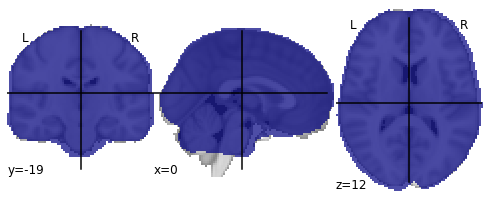

In [2]:
# build grouped mask
mask_img_temp = '/media/Data/KPE_BIDS/derivatives/fmriprep/sub-*/ses-[1,2]/func/sub-*_ses-[1,2]_task-Memory_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
mask_files = glob.glob(mask_img_temp)
mean_mask = nilearn.image.mean_img(mask_files, n_jobs=5)
plotting.plot_anat(mean_mask)

group_mask = nilearn.image.math_img("a>=0.95", a=mean_mask)
%matplotlib inline
nilearn.plotting.plot_roi(group_mask)

## Compare before-after scans

In [3]:
tstat_list.sort()
print(tstat_list)
tstat_ses2 = glob.glob('/media/Data/KPE_results/work/kpeTask_ses2/1stLevel/_subject_id_*/con_0002.nii')
tstat_ses2.sort()
print(tstat_ses2)


NameError: name 'tstat_list' is not defined

In [10]:
# create diff image
group = 'all'
contrast = '02'
tstat_list = glob.glob('/media/Data/KPE_results/work/kpeTask_ses1/1stLevel/_subject_id_*/con_00%s.nii' %(contrast))
tstat_ses2 = glob.glob('/media/Data/KPE_results/work/kpeTask_ses2/1stLevel/_subject_id_*/con_00%s.nii'%(contrast))
import os
os.chdir(work_dir)

for ses1,ses2 in zip(tstat_list,tstat_ses2):
    print (ses1)
    print (ses2)
    sub = ses1.split('id_')
    sub = sub[1].split('/')[0]
    print(sub)
    diff_file = 'kpe' + sub + 'diff' + group + 'con' + contrast
    cmd = ['fslmaths', str(ses2), '-sub', str(ses1), str(diff_file)]
    subprocess.call(cmd)


/media/Data/KPE_results/work/kpeTask_ses1/1stLevel/_subject_id_1322/con_0002.nii
/media/Data/KPE_results/work/kpeTask_ses2/1stLevel/_subject_id_1322/con_0002.nii
1322
/media/Data/KPE_results/work/kpeTask_ses1/1stLevel/_subject_id_1387/con_0002.nii
/media/Data/KPE_results/work/kpeTask_ses2/1stLevel/_subject_id_1387/con_0002.nii
1387
/media/Data/KPE_results/work/kpeTask_ses1/1stLevel/_subject_id_1339/con_0002.nii
/media/Data/KPE_results/work/kpeTask_ses2/1stLevel/_subject_id_1339/con_0002.nii
1339
/media/Data/KPE_results/work/kpeTask_ses1/1stLevel/_subject_id_1464/con_0002.nii
/media/Data/KPE_results/work/kpeTask_ses2/1stLevel/_subject_id_1464/con_0002.nii
1464
/media/Data/KPE_results/work/kpeTask_ses1/1stLevel/_subject_id_1315/con_0002.nii
/media/Data/KPE_results/work/kpeTask_ses2/1stLevel/_subject_id_1315/con_0002.nii
1315
/media/Data/KPE_results/work/kpeTask_ses1/1stLevel/_subject_id_1223/con_0002.nii
/media/Data/KPE_results/work/kpeTask_ses2/1stLevel/_subject_id_1223/con_0002.nii
122

In [14]:
diff_list = glob.glob(work_dir + '/kpe*diffallcon%s.nii.gz' %(contrast))
diff_list

['/media/Data/work/KPE_ROI/kpe1369diffallcon02.nii.gz',
 '/media/Data/work/KPE_ROI/kpe1364diffallcon02.nii.gz',
 '/media/Data/work/KPE_ROI/kpe1307diffallcon02.nii.gz',
 '/media/Data/work/KPE_ROI/kpe1356diffallcon02.nii.gz',
 '/media/Data/work/KPE_ROI/kpe1468diffallcon02.nii.gz',
 '/media/Data/work/KPE_ROI/kpe1293diffallcon02.nii.gz',
 '/media/Data/work/KPE_ROI/kpe1403diffallcon02.nii.gz',
 '/media/Data/work/KPE_ROI/kpe1343diffallcon02.nii.gz',
 '/media/Data/work/KPE_ROI/kpe1322diffallcon02.nii.gz',
 '/media/Data/work/KPE_ROI/kpe1387diffallcon02.nii.gz',
 '/media/Data/work/KPE_ROI/kpe1263diffallcon02.nii.gz',
 '/media/Data/work/KPE_ROI/kpe1253diffallcon02.nii.gz',
 '/media/Data/work/KPE_ROI/kpe008diffallcon02.nii.gz',
 '/media/Data/work/KPE_ROI/kpe1499diffallcon02.nii.gz',
 '/media/Data/work/KPE_ROI/kpe1315diffallcon02.nii.gz',
 '/media/Data/work/KPE_ROI/kpe1351diffallcon02.nii.gz',
 '/media/Data/work/KPE_ROI/kpe1390diffallcon02.nii.gz',
 '/media/Data/work/KPE_ROI/kpe1339diffallcon02.ni

In [15]:
# create mask
mask_file = '/media/Data/work/KPE_ROI/binConjunc_PvNxDECxRECxMONxPRI_vmpfc.nii.gz'

In [16]:
from nilearn.input_data import NiftiMasker

# here I use a masked image so all will have same size
nifti_masker = NiftiMasker(
    mask_img= mask_file,
    smoothing_fwhm=4,
    memory='nilearn_cache', memory_level=1, verbose=2)  # cache options
fmri_masked = nifti_masker.fit_transform(diff_list)


[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x7fa2a0774c90>, target_affine=None, target_shape=None, copy=False, interpolation='nearest')
_____________________________________________________resample_img - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask([ '/media/Data/work/KPE_ROI/kpe1369diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1364diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1307diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1356diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1468diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1293diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1403diffallcon02.nii.gz

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in

[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 3.2s, 0.1min


In [17]:
from nilearn import input_data
brainMasker = input_data.NiftiMasker(
        smoothing_fwhm=4, mask_img=mask_file,
        detrend=True, standardize=True,
        t_r=1.,
        memory='/media/Data/nilearn', memory_level=1, verbose=2)
brainMasker.fit(diff_file)

[NiftiMasker.fit] Loading data from kpe1403diffallcon02
[NiftiMasker.fit] Resampling mask
[Memory]    0.1s, 0.0min: Loading resample_img...


NiftiMasker(detrend=True, dtype=None, high_pass=None, low_pass=None,
            mask_args=None,
            mask_img='/media/Data/work/KPE_ROI/binConjunc_PvNxDECxRECxMONxPRI_vmpfc.nii.gz',
            mask_strategy='background',
            memory=Memory(cachedir='/media/Data/nilearn/joblib'),
            memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=4,
            standardize=True, t_r=1.0, target_affine=None, target_shape=None,
            verbose=2)

In [18]:
mean_diff = np.mean(fmri_masked, axis = 0)
mean_diff.shape

(449,)

In [19]:
delta_img = brainMasker.inverse_transform(mean_diff.T)
    # save it as file
delta_img.to_filename(
    '/media/Data/work/KPE_ROI/con%s_all_Ses1_2' %(contrast))

[Memory]    6.4s, 0.1min: Loading unmask...


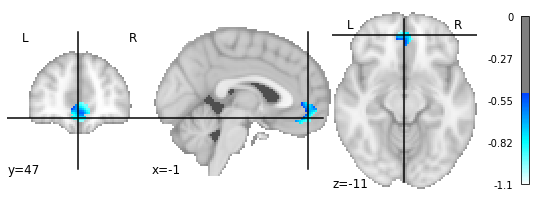

In [21]:
plotting.plot_stat_map(delta_img,threshold = 0.5)
                      #bg_img = anat_mean)

Run actual TFCE using fsl Randomize

Group difference

In [4]:
import pandas as pd
medication_cond = pd.read_csv('/home/or/kpe_task_analysis/task_based_analysis/kpe_sub_condition.csv')

ketamine_list = list(medication_cond['scr_id'][medication_cond['med_cond']==1])
ket_list = []
for subject in ketamine_list:
    print(subject)
    sub = subject.split('KPE')[1]
    ket_list.append(sub)


midazolam_list = list(medication_cond['scr_id'][medication_cond['med_cond']==0])
mid_list = []
for subject in midazolam_list:
    print(subject)
    sub = subject.split('KPE')[1]
    mid_list.append(sub)
mid_list.remove('1480')

KPE008
KPE1223
KPE1293
KPE1307
KPE1315
KPE1322
KPE1339
KPE1343
KPE1387
KPE1464
KPE1499
KPE1253
KPE1263
KPE1351
KPE1356
KPE1364
KPE1369
KPE1390
KPE1403
KPE1468
KPE1480


In [5]:
ket_func = ['/media/Data/work/KPE_ROI/kpe%sdiffallcon%s.nii.gz'% (sub, contrast) for sub in ket_list]
mid_func = ['/media/Data/work/KPE_ROI/kpe%sdiffallcon%s.nii.gz' % (sub, contrast) for sub in mid_list]

NameError: name 'contrast' is not defined

## Start with Ketamine

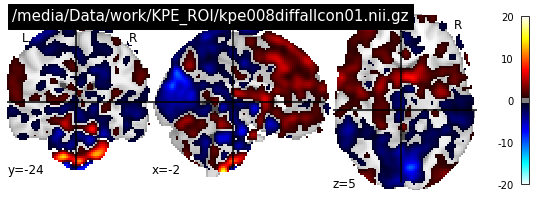

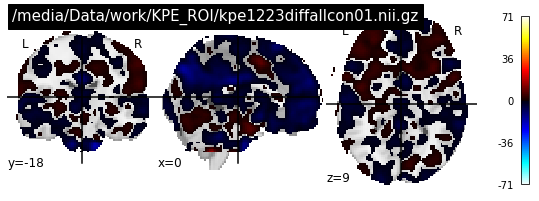

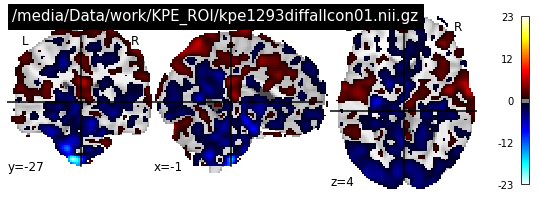

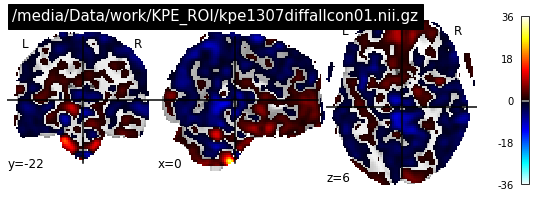

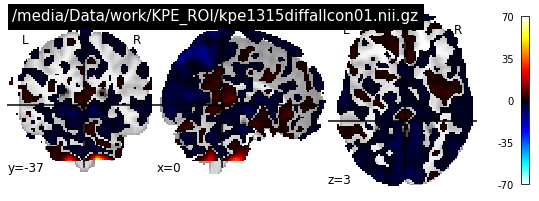

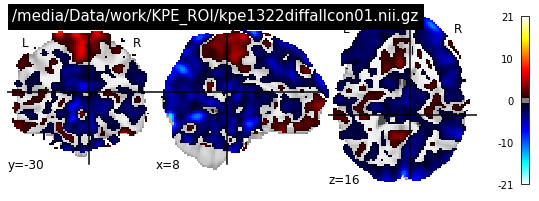

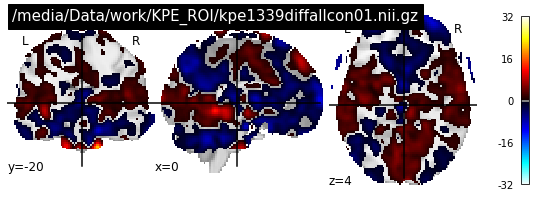

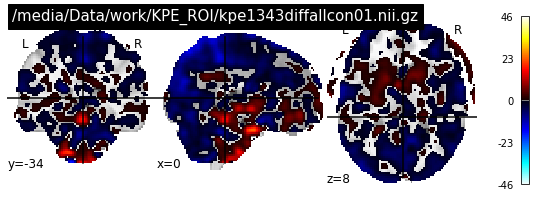

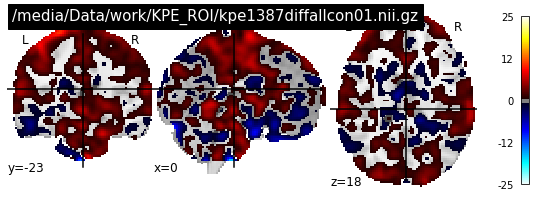

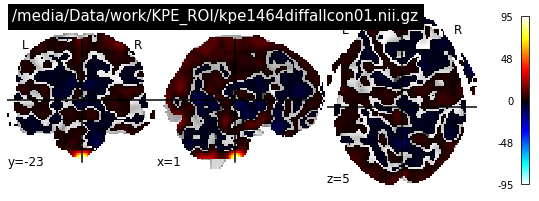

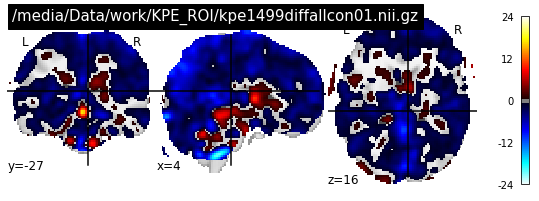

In [79]:
for sub in ket_func:
    plotting.plot_stat_map(sub, threshold=0.8, title = sub)

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
[Memory]    0.0s, 0.0min: Loading filter_and_mask...
[NiftiMasker.fit] Loading data from [/media/Data/work/KPE_ROI/kpe008diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1223diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1293diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1307diffallco
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
[Memory]    0.0s, 0.0min: Loading unmask...


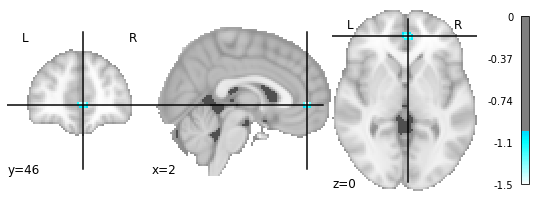

In [28]:
# here I use a masked image so all will have same size
group = 'ket'
nifti_masker = NiftiMasker(
    mask_img= mask_file,
    smoothing_fwhm=4,
    memory='nilearn_cache', memory_level=1, verbose=2)  # cache options
fmri_masked = nifti_masker.fit_transform(ket_func)
from nilearn import input_data
brainMasker = input_data.NiftiMasker(
        smoothing_fwhm=4, mask_img=mask_file,
        detrend=True, standardize=True,
        t_r=1.,
        memory='/media/Data/nilearn', memory_level=1, verbose=2)
brainMasker.fit(ket_func)

mean_diff = np.mean(fmri_masked, axis = 0)
mean_diff.shape

delta_img = brainMasker.inverse_transform(mean_diff.T)
    # save it as file
delta_img.to_filename(
    '/media/Data/work/KPE_ROI/con%s_%s_Ses1_2' %(contrast, group))

plotting.plot_stat_map(delta_img,threshold = 1)
                      

## Midazolam

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
[Memory]    0.0s, 0.0min: Loading filter_and_mask...
[NiftiMasker.fit] Loading data from [/media/Data/work/KPE_ROI/kpe1253diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1263diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1351diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1356diffallc
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
[Memory]    0.0s, 0.0min: Loading unmask...


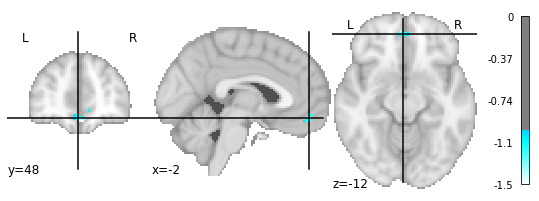

In [27]:
# here I use a masked image so all will have same size
group = 'mid'
nifti_masker = NiftiMasker(
    mask_img= mask_file,
    smoothing_fwhm=4,
    memory='nilearn_cache', memory_level=1, verbose=2)  # cache options
fmri_masked = nifti_masker.fit_transform(mid_func)
from nilearn import input_data
brainMasker = input_data.NiftiMasker(
        smoothing_fwhm=4, mask_img=mask_file,
        detrend=True, standardize=True,
        t_r=1.,
        memory='/media/Data/nilearn', memory_level=1, verbose=2)
brainMasker.fit(mid_func)

mean_diff = np.mean(fmri_masked, axis = 0)
mean_diff.shape

delta_img = brainMasker.inverse_transform(mean_diff.T)
    # save it as file
delta_img.to_filename(
    '/media/Data/work/KPE_ROI/con%s_%s_Ses1_2' %(contrast, group))

plotting.plot_stat_map(delta_img,threshold = 1)

## Striatum - Ketamine

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask([ '/media/Data/work/KPE_ROI/kpe008diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1223diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1293diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1307diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1315diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1322diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1339diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1343diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1387diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1464diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1499diffallcon02.nii.gz'], 
<nibabel.nifti1.Nifti1Image object at 0x7fa29a622dd0>, { 'detrend': False,
  'dtyp

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in

[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 1.8s, 0.0min
[NiftiMasker.fit] Loading data from [/media/Data/work/KPE_ROI/kpe008diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1223diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1293diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1307diffallco
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.358917, ...,  0.006478], dtype=float32), <nibabel.nifti1.Nifti1Image object at 0x7fa29a622ed0>)
___________________________________________________________unmask - 0.1s, 0.0min


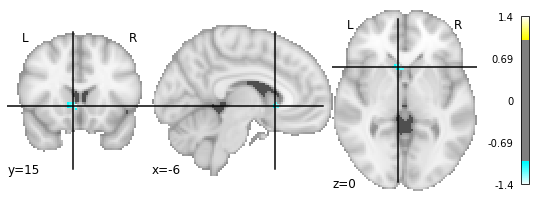

In [29]:
mask_file = '/media/Data/work/KPE_ROI/binConjunc_PvNxDECxRECxMONxPRI_striatum.nii.gz'
group = 'ket'
nifti_masker = NiftiMasker(
    mask_img= mask_file,
    smoothing_fwhm=4,
    memory='nilearn_cache', memory_level=1, verbose=2)  # cache options
fmri_masked = nifti_masker.fit_transform(ket_func)
from nilearn import input_data
brainMasker = input_data.NiftiMasker(
        smoothing_fwhm=4, mask_img=mask_file,
        detrend=True, standardize=True,
        t_r=1.,
        memory='/media/Data/nilearn', memory_level=1, verbose=2)
brainMasker.fit(ket_func)

mean_diff = np.mean(fmri_masked, axis = 0)
mean_diff.shape

delta_img = brainMasker.inverse_transform(mean_diff.T)
    # save it as file
delta_img.to_filename(
    '/media/Data/work/KPE_ROI/con%s_%s_Ses1_2' %(contrast, group))

plotting.plot_stat_map(delta_img,threshold = 1)

## Midazolam

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask([ '/media/Data/work/KPE_ROI/kpe1253diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1263diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1351diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1356diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1364diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1369diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1390diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1403diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1468diffallcon02.nii.gz'], 
<nibabel.nifti1.Nifti1Image object at 0x7fa29a2eaa50>, { 'detrend': False,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'sample_mask': None,
  'sessions': None,
  'smoothing_fwhm':

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in

[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 1.5s, 0.0min
[NiftiMasker.fit] Loading data from [/media/Data/work/KPE_ROI/kpe1253diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1263diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1351diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1356diffallc
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([0.033937, ..., 0.211592], dtype=float32), <nibabel.nifti1.Nifti1Image object at 0x7fa29a1c8050>)
___________________________________________________________unmask - 0.1s, 0.0min


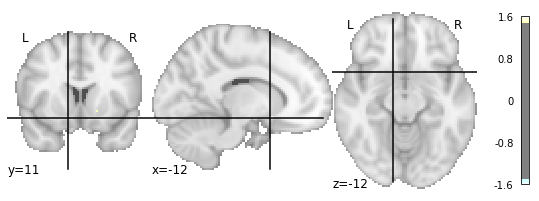

In [30]:
group = 'mid'
nifti_masker = NiftiMasker(
    mask_img= mask_file,
    smoothing_fwhm=4,
    memory='nilearn_cache', memory_level=1, verbose=2)  # cache options
fmri_masked = nifti_masker.fit_transform(mid_func)
from nilearn import input_data
brainMasker = input_data.NiftiMasker(
        smoothing_fwhm=4, mask_img=mask_file,
        detrend=True, standardize=True,
        t_r=1.,
        memory='/media/Data/nilearn', memory_level=1, verbose=2)
brainMasker.fit(mid_func)

mean_diff = np.mean(fmri_masked, axis = 0)
mean_diff.shape

delta_img = brainMasker.inverse_transform(mean_diff.T)
    # save it as file
delta_img.to_filename(
    '/media/Data/work/KPE_ROI/con%s_%s_Ses1_2' %(contrast, group))

plotting.plot_stat_map(delta_img,threshold = 1.5)

## Amygdala - Ketamine
I used neurosynth to generate a mask file. Used metaanalysis with the term Amygdala, then thresholded it accordingly. 

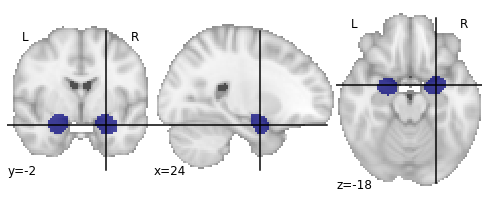

In [33]:
mask_file = '/media/Data/work/KPE_ROI/amygdala_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=19", a=mask_file)
nilearn.plotting.plot_roi(mask_file)


[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x7fa299da15d0>, target_affine=None, target_shape=None, copy=False, interpolation='nearest')
_____________________________________________________resample_img - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask([ '/media/Data/work/KPE_ROI/kpe008diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1223diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1293diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1307diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1315diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1322diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1339diffallcon02.nii.gz'

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in

[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 1.8s, 0.0min
[NiftiMasker.fit] Loading data from [/media/Data/work/KPE_ROI/kpe008diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1223diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1293diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1307diffallco
[NiftiMasker.fit] Resampling mask
________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x7fa299da15d0>, target_affine=None, target_shape=None, copy=False, interpolation='nearest')
_____________________________________________________resample_img - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.

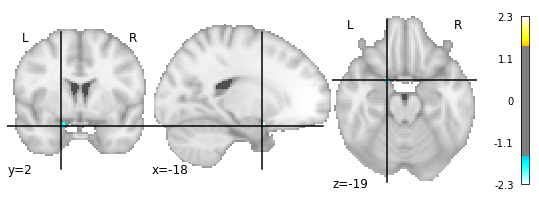

In [34]:
group = 'ket'
nifti_masker = NiftiMasker(
    mask_img= mask_file,
    smoothing_fwhm=4,
    memory='nilearn_cache', memory_level=1, verbose=2)  # cache options
fmri_masked = nifti_masker.fit_transform(ket_func)
from nilearn import input_data
brainMasker = input_data.NiftiMasker(
        smoothing_fwhm=4, mask_img=mask_file,
        detrend=True, standardize=True,
        t_r=1.,
        memory='/media/Data/nilearn', memory_level=1, verbose=2)
brainMasker.fit(ket_func)

mean_diff = np.mean(fmri_masked, axis = 0)
mean_diff.shape

delta_img = brainMasker.inverse_transform(mean_diff.T)
    # save it as file
delta_img.to_filename(
    '/media/Data/work/KPE_ROI/con%s_%s_Ses1_2' %(contrast, group))

plotting.plot_stat_map(delta_img,threshold = 1.5)

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask([ '/media/Data/work/KPE_ROI/kpe1253diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1263diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1351diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1356diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1364diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1369diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1390diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1403diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1468diffallcon02.nii.gz'], 
<nibabel.nifti1.Nifti1Image object at 0x7fa299ca4790>, { 'detrend': False,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'sample_mask': None,
  'sessions': None,
  'smoothing_fwhm':

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in

[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 1.6s, 0.0min
[NiftiMasker.fit] Loading data from [/media/Data/work/KPE_ROI/kpe1253diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1263diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1351diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1356diffallc
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.252159, ...,  0.671368], dtype=float32), <nibabel.nifti1.Nifti1Image object at 0x7fa299b1ebd0>)
___________________________________________________________unmask - 0.1s, 0.0min


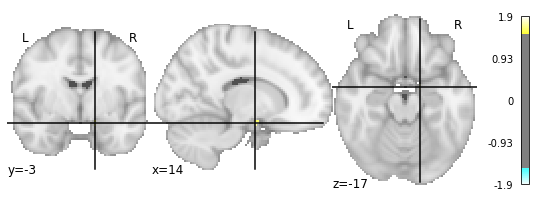

In [35]:
group = 'mid'
nifti_masker = NiftiMasker(
    mask_img= mask_file,
    smoothing_fwhm=4,
    memory='nilearn_cache', memory_level=1, verbose=2)  # cache options
fmri_masked = nifti_masker.fit_transform(mid_func)
from nilearn import input_data
brainMasker = input_data.NiftiMasker(
        smoothing_fwhm=4, mask_img=mask_file,
        detrend=True, standardize=True,
        t_r=1.,
        memory='/media/Data/nilearn', memory_level=1, verbose=2)
brainMasker.fit(mid_func)

mean_diff = np.mean(fmri_masked, axis = 0)
mean_diff.shape

delta_img = brainMasker.inverse_transform(mean_diff.T)
    # save it as file
delta_img.to_filename(
    '/media/Data/work/KPE_ROI/con%s_%s_Ses1_2' %(contrast, group))

plotting.plot_stat_map(delta_img,threshold = 1.5)

## vACC - Ketamine first

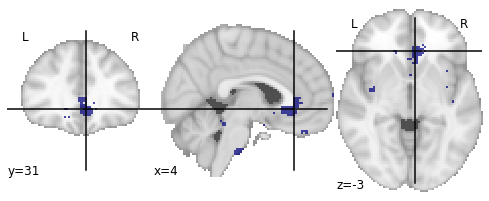

In [37]:
mask_file = '/media/Data/work/KPE_ROI/ventral anterior_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=4", a=mask_file)
nilearn.plotting.plot_roi(mask_file)


[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask([ '/media/Data/work/KPE_ROI/kpe008diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1223diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1293diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1307diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1315diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1322diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1339diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1343diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1387diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1464diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1499diffallcon02.nii.gz'], 
<nibabel.nifti1.Nifti1Image object at 0x7fa29992cd10>, { 'detrend': False,
  'dtyp

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in

[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 3.4s, 0.1min
[NiftiMasker.fit] Loading data from [/media/Data/work/KPE_ROI/kpe008diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1223diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1293diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1307diffallco
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.142441, ..., -0.63876 ], dtype=float32), <nibabel.nifti1.Nifti1Image object at 0x7fa2999e4750>)
___________________________________________________________unmask - 0.1s, 0.0min


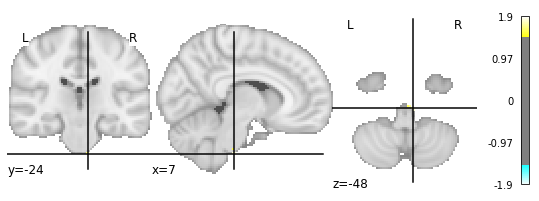

In [38]:
group = 'ket'
nifti_masker = NiftiMasker(
    mask_img= mask_file,
    smoothing_fwhm=4,
    memory='nilearn_cache', memory_level=1, verbose=2)  # cache options
fmri_masked = nifti_masker.fit_transform(ket_func)
from nilearn import input_data
brainMasker = input_data.NiftiMasker(
        smoothing_fwhm=4, mask_img=mask_file,
        detrend=True, standardize=True,
        t_r=1.,
        memory='/media/Data/nilearn', memory_level=1, verbose=2)
brainMasker.fit(ket_func)

mean_diff = np.mean(fmri_masked, axis = 0)
mean_diff.shape

delta_img = brainMasker.inverse_transform(mean_diff.T)
    # save it as file
delta_img.to_filename(
    '/media/Data/work/KPE_ROI/con%s_%s_Ses1_2' %(contrast, group))

plotting.plot_stat_map(delta_img,threshold = 1.5)

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask([ '/media/Data/work/KPE_ROI/kpe1253diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1263diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1351diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1356diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1364diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1369diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1390diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1403diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1468diffallcon02.nii.gz'], 
<nibabel.nifti1.Nifti1Image object at 0x7fa29992a4d0>, { 'detrend': False,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'sample_mask': None,
  'sessions': None,
  'smoothing_fwhm':

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in

[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 2.7s, 0.0min
[NiftiMasker.fit] Loading data from [/media/Data/work/KPE_ROI/kpe1253diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1263diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1351diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1356diffallc
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.0658  , ..., -0.253689], dtype=float32), <nibabel.nifti1.Nifti1Image object at 0x7fa29992cd10>)
___________________________________________________________unmask - 0.1s, 0.0min


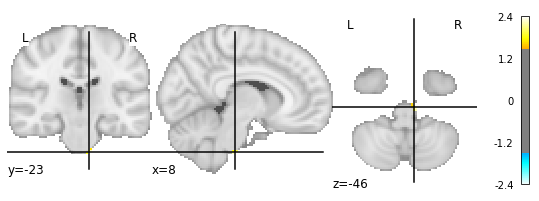

In [39]:
group = 'mid'
nifti_masker = NiftiMasker(
    mask_img= mask_file,
    smoothing_fwhm=4,
    memory='nilearn_cache', memory_level=1, verbose=2)  # cache options
fmri_masked = nifti_masker.fit_transform(mid_func)
from nilearn import input_data
brainMasker = input_data.NiftiMasker(
        smoothing_fwhm=4, mask_img=mask_file,
        detrend=True, standardize=True,
        t_r=1.,
        memory='/media/Data/nilearn', memory_level=1, verbose=2)
brainMasker.fit(mid_func)

mean_diff = np.mean(fmri_masked, axis = 0)
mean_diff.shape

delta_img = brainMasker.inverse_transform(mean_diff.T)
    # save it as file
delta_img.to_filename(
    '/media/Data/work/KPE_ROI/con%s_%s_Ses1_2' %(contrast, group))

plotting.plot_stat_map(delta_img,threshold = 1.5)

## Hippocampus - Ketamin

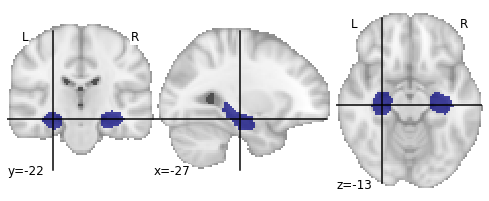

In [40]:
mask_file = '/media/Data/work/KPE_ROI/hippocampus_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=12", a=mask_file)
nilearn.plotting.plot_roi(mask_file)

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask([ '/media/Data/work/KPE_ROI/kpe008diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1223diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1293diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1307diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1315diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1322diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1339diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1343diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1387diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1464diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1499diffallcon02.nii.gz'], 
<nibabel.nifti1.Nifti1Image object at 0x7fa29959ea50>, { 'detrend': False,
  'dtyp

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in

[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 1.9s, 0.0min
[NiftiMasker.fit] Loading data from [/media/Data/work/KPE_ROI/kpe008diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1223diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1293diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1307diffallco
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.064044, ...,  0.438721], dtype=float32), <nibabel.nifti1.Nifti1Image object at 0x7fa299933250>)
___________________________________________________________unmask - 0.1s, 0.0min


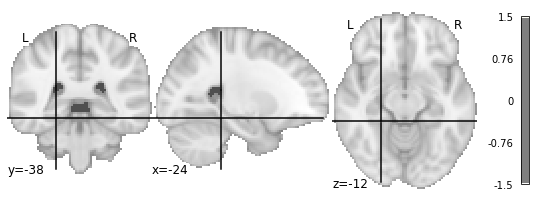

In [41]:
group = 'ket'
nifti_masker = NiftiMasker(
    mask_img= mask_file,
    smoothing_fwhm=4,
    memory='nilearn_cache', memory_level=1, verbose=2)  # cache options
fmri_masked = nifti_masker.fit_transform(ket_func)
from nilearn import input_data
brainMasker = input_data.NiftiMasker(
        smoothing_fwhm=4, mask_img=mask_file,
        detrend=True, standardize=True,
        t_r=1.,
        memory='/media/Data/nilearn', memory_level=1, verbose=2)
brainMasker.fit(ket_func)

mean_diff = np.mean(fmri_masked, axis = 0)
mean_diff.shape

delta_img = brainMasker.inverse_transform(mean_diff.T)
    # save it as file
delta_img.to_filename(
    '/media/Data/work/KPE_ROI/con%s_%s_Ses1_2' %(contrast, group))

plotting.plot_stat_map(delta_img,threshold = 1.5)

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask([ '/media/Data/work/KPE_ROI/kpe1253diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1263diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1351diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1356diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1364diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1369diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1390diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1403diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1468diffallcon02.nii.gz'], 
<nibabel.nifti1.Nifti1Image object at 0x7fa2993ec510>, { 'detrend': False,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'sample_mask': None,
  'sessions': None,
  'smoothing_fwhm':

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in

[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 1.5s, 0.0min
[NiftiMasker.fit] Loading data from [/media/Data/work/KPE_ROI/kpe1253diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1263diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1351diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1356diffallc
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-0.314107, ..., -0.610047], dtype=float32), <nibabel.nifti1.Nifti1Image object at 0x7fa29959ea10>)
___________________________________________________________unmask - 0.1s, 0.0min


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


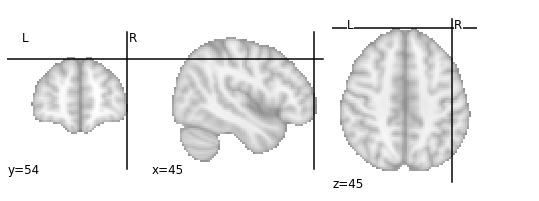

In [42]:
group = 'mid'
nifti_masker = NiftiMasker(
    mask_img= mask_file,
    smoothing_fwhm=4,
    memory='nilearn_cache', memory_level=1, verbose=2)  # cache options
fmri_masked = nifti_masker.fit_transform(mid_func)
from nilearn import input_data
brainMasker = input_data.NiftiMasker(
        smoothing_fwhm=4, mask_img=mask_file,
        detrend=True, standardize=True,
        t_r=1.,
        memory='/media/Data/nilearn', memory_level=1, verbose=2)
brainMasker.fit(mid_func)

mean_diff = np.mean(fmri_masked, axis = 0)
mean_diff.shape

delta_img = brainMasker.inverse_transform(mean_diff.T)
    # save it as file
delta_img.to_filename(
    '/media/Data/work/KPE_ROI/con%s_%s_Ses1_2' %(contrast, group))

plotting.plot_stat_map(delta_img,threshold = 1.5)

In [121]:
# surface plotting
from nilearn import plotting, datasets    
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps


view = plotting.view_img_on_surf(mask_file,surf_mesh='fsaverage5', threshold = 0.01)   

view

## Insula - Ketamine

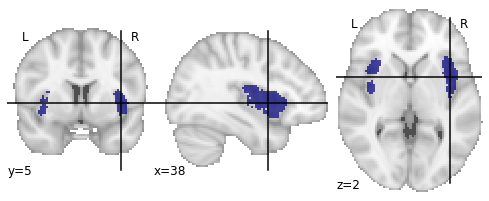

In [6]:
mask_file = '/media/Data/work/KPE_ROI/insula_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=10", a=mask_file)
nilearn.plotting.plot_roi(mask_file)

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
[Memory]    0.1s, 0.0min: Loading filter_and_mask...
[NiftiMasker.fit] Loading data from [/media/Data/work/KPE_ROI/kpe008diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1223diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1293diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1307diffallco
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
[Memory]    0.0s, 0.0min: Loading unmask...


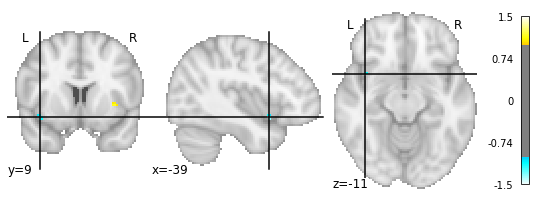

In [16]:
group = 'ket'
nifti_masker = NiftiMasker(
    mask_img= mask_file,
    smoothing_fwhm=4,
    memory='nilearn_cache', memory_level=1, verbose=2)  # cache options
fmri_masked = nifti_masker.fit_transform(ket_func)
from nilearn import input_data
brainMasker = input_data.NiftiMasker(
        smoothing_fwhm=4, mask_img=mask_file,
        detrend=True, standardize=True,
        t_r=1.,
        memory='/media/Data/nilearn', memory_level=1, verbose=2)
brainMasker.fit(ket_func)

mean_diff = np.mean(fmri_masked, axis = 0)
mean_diff.shape

delta_img = brainMasker.inverse_transform(mean_diff.T)
    # save it as file
delta_img.to_filename(
    '/media/Data/work/KPE_ROI/con%s_%s_Ses1_2' %(contrast, group))

plotting.plot_stat_map(delta_img,threshold = 1)

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
________________________________________________________________________________
[Memory] Calling nilearn.input_data.nifti_masker.filter_and_mask...
filter_and_mask([ '/media/Data/work/KPE_ROI/kpe1253diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1263diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1351diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1356diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1364diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1369diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1390diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1403diffallcon02.nii.gz',
  '/media/Data/work/KPE_ROI/kpe1468diffallcon02.nii.gz'], 
<nibabel.nifti1.Nifti1Image object at 0x7fa039495e50>, { 'detrend': False,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'sample_mask': None,
  'sessions': None,
  'smoothing_fwhm':

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  fill_value=fill_value)
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/image/resampling.py:543: RuntimeWarning: NaNs or infinite values are present in

[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 1.6s, 0.0min
[NiftiMasker.fit] Loading data from [/media/Data/work/KPE_ROI/kpe1253diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1263diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1351diffallcon02.nii.gz, /media/Data/work/KPE_ROI/kpe1356diffallc
[NiftiMasker.fit] Resampling mask
[Memory]    0.0s, 0.0min: Loading resample_img...
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([-1.463832, ..., -0.551494], dtype=float32), <nibabel.nifti1.Nifti1Image object at 0x7fa0401d16d0>)
___________________________________________________________unmask - 0.1s, 0.0min


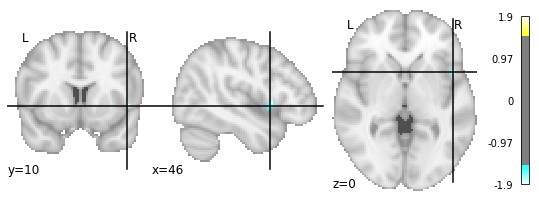

In [17]:
group = 'mid'
nifti_masker = NiftiMasker(
    mask_img= mask_file,
    smoothing_fwhm=4,
    memory='nilearn_cache', memory_level=1, verbose=2)  # cache options
fmri_masked = nifti_masker.fit_transform(mid_func)
from nilearn import input_data
brainMasker = input_data.NiftiMasker(
        smoothing_fwhm=4, mask_img=mask_file,
        detrend=True, standardize=True,
        t_r=1.,
        memory='/media/Data/nilearn', memory_level=1, verbose=2)
brainMasker.fit(mid_func)

mean_diff = np.mean(fmri_masked, axis = 0)
mean_diff.shape

delta_img = brainMasker.inverse_transform(mean_diff.T)
    # save it as file
delta_img.to_filename(
    '/media/Data/work/KPE_ROI/con%s_%s_Ses1_2' %(contrast, group))

plotting.plot_stat_map(delta_img,threshold = 1.5)

In [43]:
def createDelta(func_files1, func_files2, mask_img):
    from nilearn.input_data import NiftiMasker
    
    # here I use a masked image so all will have same size
    nifti_masker = NiftiMasker(
        mask_img= mask_img,
        smoothing_fwhm=6,
        memory='nilearn_cache', memory_level=1, verbose=2)  # cache options
    fmri_masked_ses1 = nifti_masker.fit_transform(func_files1)
    fmri_masked_ses2 = nifti_masker.fit_transform(func_files2)
    ###
    from nilearn import input_data
    brainMasker = input_data.NiftiMasker(
            smoothing_fwhm=4, mask_img=mask_img,
            detrend=True, standardize=True,
            t_r=1.,
            memory='/media/Data/nilearn', memory_level=1, verbose=2)
    brainMasker.fit(func_files1)

    ####
    deltaCor_a = fmri_masked_ses1 - fmri_masked_ses2
    print (f'Shape is: {deltaCor_a.shape}')

    # run paired t-test 
    testDelta = scipy.stats.ttest_rel(fmri_masked_ses1, fmri_masked_ses2) 
    print (f'Sum of p values < 0.005 is {np.sum(testDelta[1]<0.005)}')

In [ ]:
amygdalaDiff_Ket = createDelta()